In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
sess = tf.Session()

In [3]:
x_vals = np.concatenate((np.random.normal(-1,1,50), np.random.normal(3,1,50)))
y_vals = np.concatenate((np.repeat(0,50), np.repeat(1,50)))
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

In [4]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(mean = 10, shape=[1]),name='A')

In [5]:
#Add operation to graph
my_output = tf.add(x_data,A)
my_output_expaneded = tf.expand_dims(my_output,0)
y_target_expanded = tf.expand_dims(y_target,0)

In [6]:
# Add L2 loss operation to graph
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits = my_output_expaneded, labels  = y_target_expanded)
# xentropy = tf.nn.sigmoid_cross_entropy_with_logits(my_output_expaneded, y_target_expanded)

In [7]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [8]:
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [9]:
#Run loop
for i in range (10000):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x,y_target: rand_y})
    if (i+1)%1000 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print(sess.run(my_output_expaneded, feed_dict={x_data: rand_x, y_target:rand_y}))
        print('Loss = '+ str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target:rand_y})))

Step #1000 A = [-0.89949393]
[[2.1853178]]
Loss = [[0.10655759]]
Step #2000 A = [-1.054525]
[[-1.1584846]]
Loss = [[0.27304673]]
Step #3000 A = [-1.0661479]
[[-1.749343]]
Loss = [[0.16032144]]
Step #4000 A = [-1.0385349]
[[2.7035735]]
Loss = [[0.0648189]]
Step #5000 A = [-1.1292624]
[[2.05911]]
Loss = [[0.12006263]]
Step #6000 A = [-1.2402918]
[[0.795707]]
Loss = [[0.37243357]]
Step #7000 A = [-1.0753174]
[[-0.87882423]]
Loss = [[0.34732094]]
Step #8000 A = [-1.156484]
[[-0.3717134]]
Loss = [[0.8961767]]
Step #9000 A = [-1.106497]
[[-0.20035762]]
Loss = [[0.5979779]]
Step #10000 A = [-0.95355475]
[[0.6959573]]
Loss = [[0.40452927]]


In [24]:
# Add summaries to tensorboard
merged = tf.summary.merge_all()

# Initialize graph writer:
writer = tf.summary.FileWriter("/tmp/log", graph=sess.graph)

In [11]:
# Evaluate Predictions
predictions = []
for i in range(len(x_vals)):
    x_val = [x_vals[i]]
    prediction = sess.run(tf.round(tf.sigmoid(my_output)), feed_dict={x_data: x_val})
    predictions.append(prediction[0])
    
accuracy = sum(x==y for x,y in zip(predictions, y_vals))/100.
print('Ending Accuracy = ' + str(np.round(accuracy, 2)))

Ending Accuracy = 0.98


# Batch and Stochastic Training

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

In [44]:
x_vals = np.random.normal(1,0.1,100)
y_vals = np.repeat(10., 100)

In [45]:
# batch size
batch_size = 25

In [37]:
#Stochastic
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

In [46]:
#Batch
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

In [47]:
#creater variable
A = tf.Variable(tf.random_normal([1,1]))

#Add operation to Graph
my_output = tf.multiply(A,x_data)

In [48]:
#branch
loss = tf.reduce_mean(tf.square(my_output-y_target))

In [39]:
#Stochastci
loss = tf.reduce_mean(tf.square(my_output-y_target))

In [49]:
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [43]:
loss_stochastic = []
#Run loop
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    if (i+1)%5==0: 
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target:rand_y})
        print('Loss = '+ str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [[9.694591]]
Loss = 0.421299
Step #10 A = [[9.634617]]
Loss = 0.25063843
Step #15 A = [[9.737362]]
Loss = 0.74494004
Step #20 A = [[9.803516]]
Loss = 0.13947438
Step #25 A = [[9.832025]]
Loss = 0.7710017
Step #30 A = [[9.762782]]
Loss = 0.9093565
Step #35 A = [[9.910922]]
Loss = 1.4587806
Step #40 A = [[10.068194]]
Loss = 0.955536
Step #45 A = [[10.202137]]
Loss = 2.2037344
Step #50 A = [[10.179743]]
Loss = 0.00036343417
Step #55 A = [[10.14425]]
Loss = 0.7056131
Step #60 A = [[9.894482]]
Loss = 5.789938
Step #65 A = [[10.022634]]
Loss = 0.8158463
Step #70 A = [[9.9242]]
Loss = 0.028903268
Step #75 A = [[9.9075365]]
Loss = 5.8689804
Step #80 A = [[9.991504]]
Loss = 0.4937265
Step #85 A = [[10.000019]]
Loss = 0.0035873586
Step #90 A = [[10.0705185]]
Loss = 0.17761579
Step #95 A = [[9.97368]]
Loss = 0.003955519
Step #100 A = [[10.018008]]
Loss = 0.02462911


In [52]:
loss_batch = []
#Run loop
for i in range(100):
    rand_index = np.random.choice(100,size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    if (i+1)%5==0: 
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target:rand_y})
        print('Loss = '+ str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[9.815966]]
Loss = 0.94210726
Step #10 A = [[9.859261]]
Loss = 1.5133262
Step #15 A = [[9.890343]]
Loss = 0.6406796
Step #20 A = [[9.890558]]
Loss = 1.0732363
Step #25 A = [[9.914341]]
Loss = 0.8740472
Step #30 A = [[9.925289]]
Loss = 1.1967031
Step #35 A = [[9.917486]]
Loss = 1.0038713
Step #40 A = [[9.94003]]
Loss = 0.99428993
Step #45 A = [[9.976014]]
Loss = 1.2429757
Step #50 A = [[9.962028]]
Loss = 1.1064446
Step #55 A = [[10.009704]]
Loss = 1.2434328
Step #60 A = [[10.046473]]
Loss = 0.67854303
Step #65 A = [[10.052352]]
Loss = 1.1424797
Step #70 A = [[10.042659]]
Loss = 0.70657057
Step #75 A = [[10.026354]]
Loss = 0.87378097
Step #80 A = [[10.0251]]
Loss = 1.190026
Step #85 A = [[10.026072]]
Loss = 1.6539545
Step #90 A = [[9.99259]]
Loss = 1.2045523
Step #95 A = [[10.003049]]
Loss = 1.193246
Step #100 A = [[10.021001]]
Loss = 1.1995126


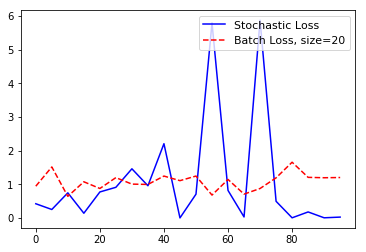

In [53]:


plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()



# Combining Everything Together

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [58]:
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2],x[3]] for x in iris.data])

In [59]:
batch_size = 20

In [60]:
sess = tf.Session()

In [61]:
x1_data = tf.placeholder(shape=[None, 1],dtype = tf.float32)
x2_data = tf.placeholder(shape = [None, 1],dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1],dtype = tf.float32)

In [62]:
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [64]:
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)

In [66]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits = my_output, labels = y_target)

In [67]:
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [68]:
# Run Loop
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    #rand_x = np.transpose([iris_2d[rand_index]])
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    #rand_y = np.transpose([binary_target[rand_index]])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

Step #200 A = [[8.617271]], b = [[-3.5556073]]
Step #400 A = [[10.172587]], b = [[-4.6411014]]
Step #600 A = [[11.167778]], b = [[-5.3650904]]
Step #800 A = [[11.855836]], b = [[-5.9206367]]
Step #1000 A = [[12.434562]], b = [[-6.355086]]


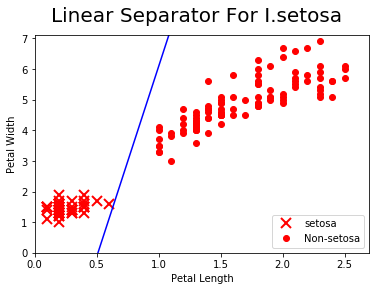

In [69]:
# Pull out slope/intercept
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)

# Create fitted line
x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
  ablineValues.append(slope*i+intercept)

# Plot the fitted line over the data
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()